In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import json



def calculate_metrics(data):
    results = {}

    for item in data:
        for detector_name, values in item.items():
            dataset = "_".join(detector_name.split("_")[:2])
            algo_name = "_".join(detector_name.split("_")[2:])
            if algo_name == "":
              print(detector_name)
            tp = values['tp']
            fp = values['fp']
            fn = values['fn']

            # Calculate precision and recall
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0

            # Calculate F1 score
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            if dataset not in results:
                results[dataset] = {}
            results[dataset][algo_name] = {
                'precision': round(precision, 4),
                'recall': round(recall, 4),
                'f1_score': round(f1, 4)
            }
    return results

#
with open('all_results.json', 'r') as file:
    data = json.load(file)

metrics = calculate_metrics(data)


apriltags_detection


In [8]:
for algo, scores in metrics["apriltags_p3"].items():
    print(f"\n{algo}:")
    print(f"F1 Score: {scores['f1_score']}")
    print(f"Precision: {scores['precision']}")
    print(f"Recall: {scores['recall']}")


detection:
F1 Score: 0.8958
Precision: 0.9894
Recall: 0.8184

detection_erosion_nofp_shape_filtering:
F1 Score: 0.9293
Precision: 0.9933
Recall: 0.873

detection_erosion_nofp_shape:
F1 Score: 0.9687
Precision: 0.9868
Recall: 0.9512

detection_erosion:
F1 Score: 0.9677
Precision: 0.9848
Recall: 0.9512

finetuned:
F1 Score: 0.9103
Precision: 0.8354
Recall: 1.0

detection_erosion_nofp_shape_filtering_dark_only:
F1 Score: 0.9293
Precision: 0.9933
Recall: 0.873

detection_pupil_threshold:
F1 Score: 0.8642
Precision: 0.9639
Recall: 0.7832

detection_pupil_threshold_shape2:
F1 Score: 0.8694
Precision: 0.9769
Recall: 0.7832

detection_pupil_shape2:
F1 Score: 0.867
Precision: 0.9709
Recall: 0.7832

detection_pupil:
F1 Score: 0.8509
Precision: 0.9315
Recall: 0.7832

trained_on_web_images:
F1 Score: 0.9546
Precision: 0.9353
Recall: 0.9748

trained_on_our_videos:
F1 Score: 0.9087
Precision: 0.8352
Recall: 0.9964


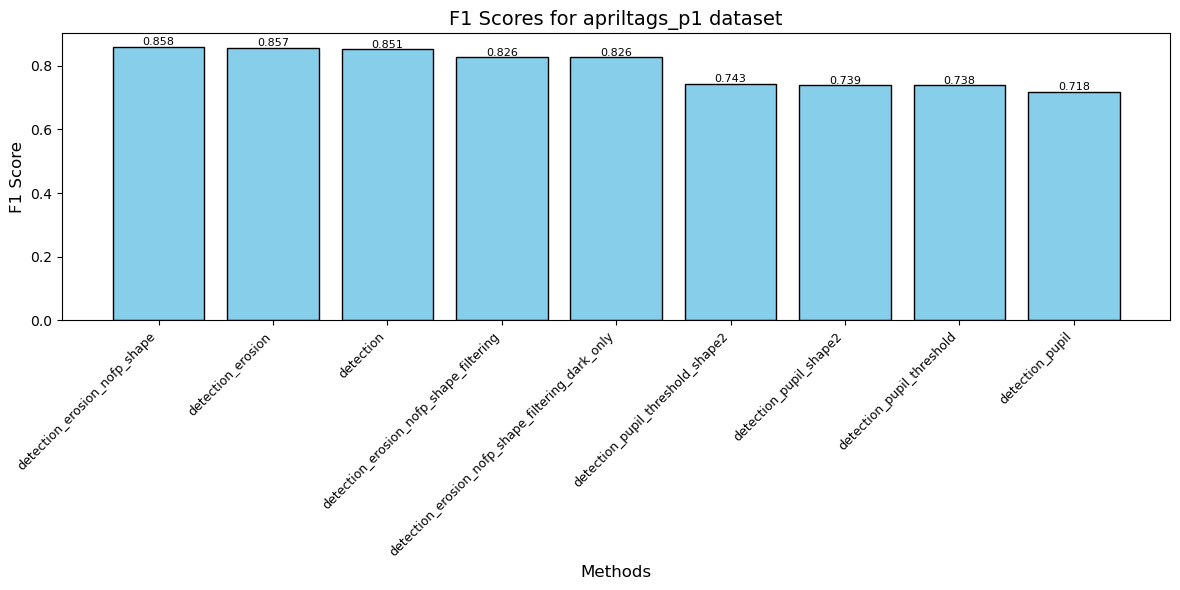

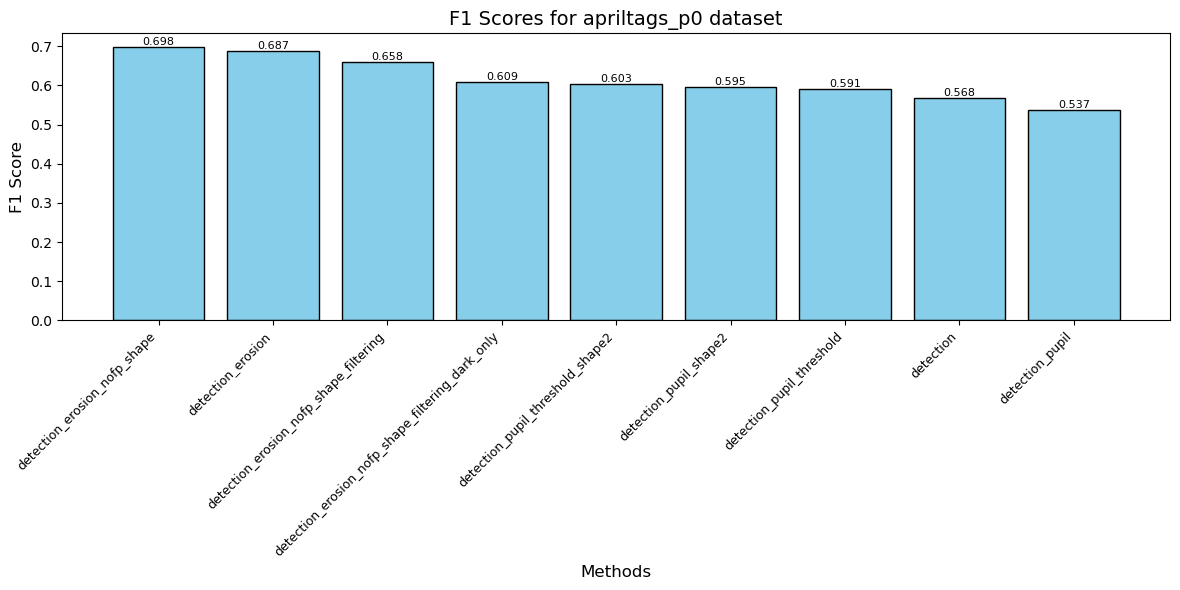

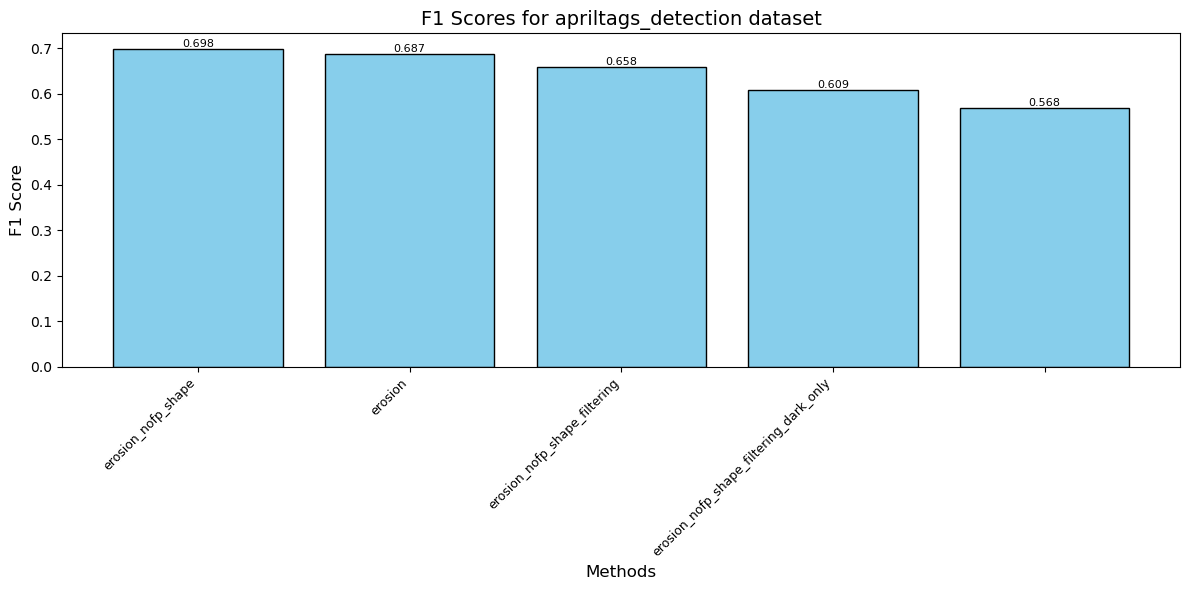

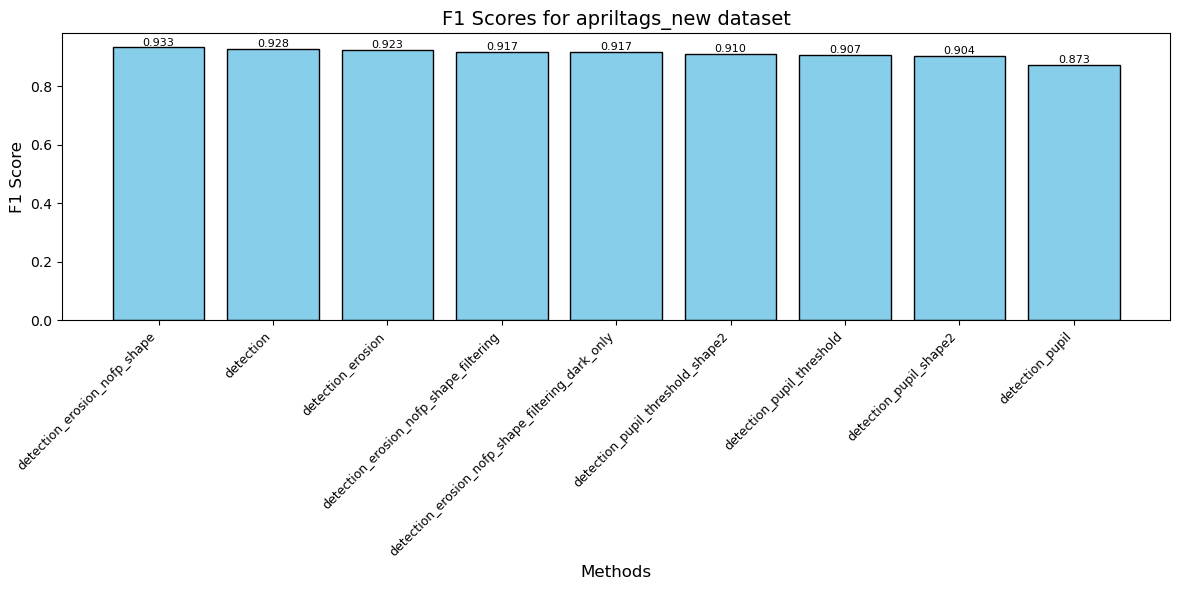

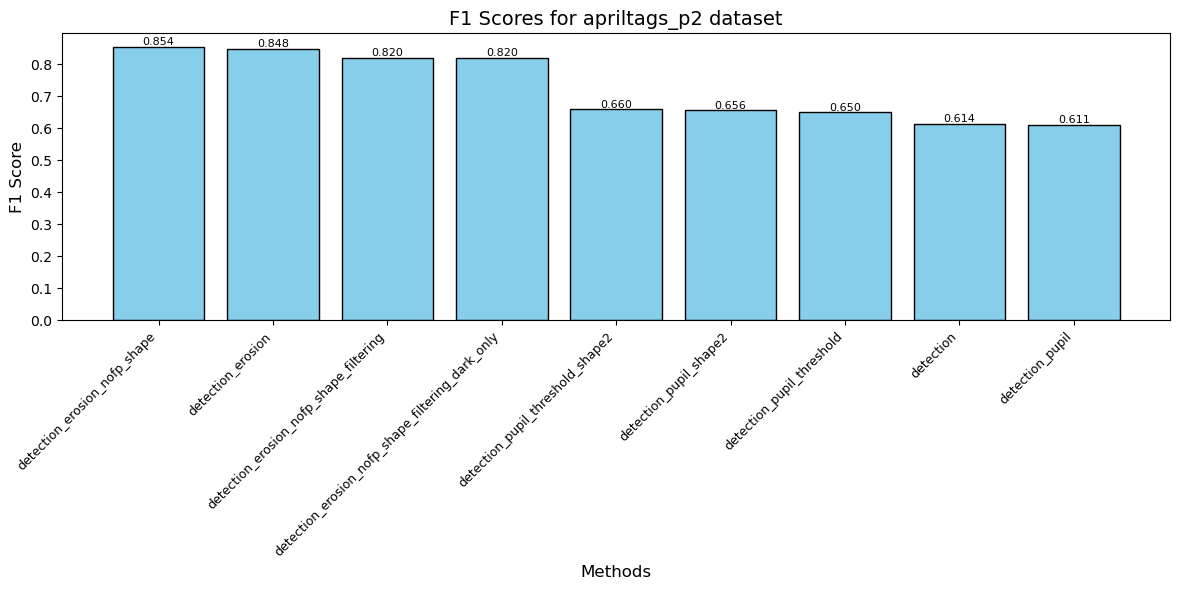

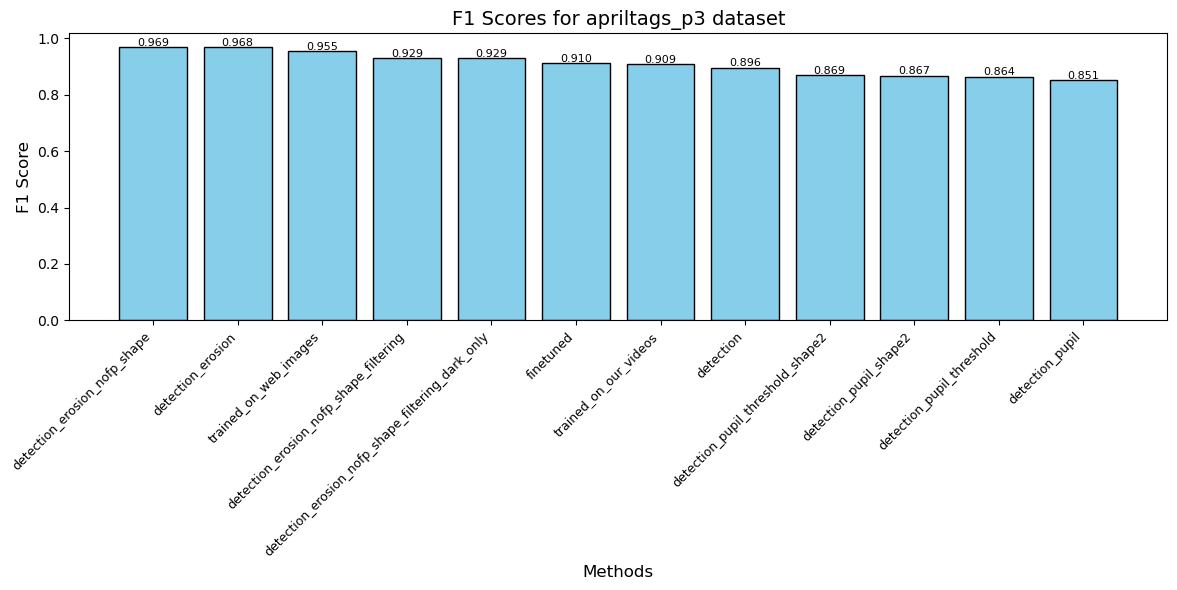

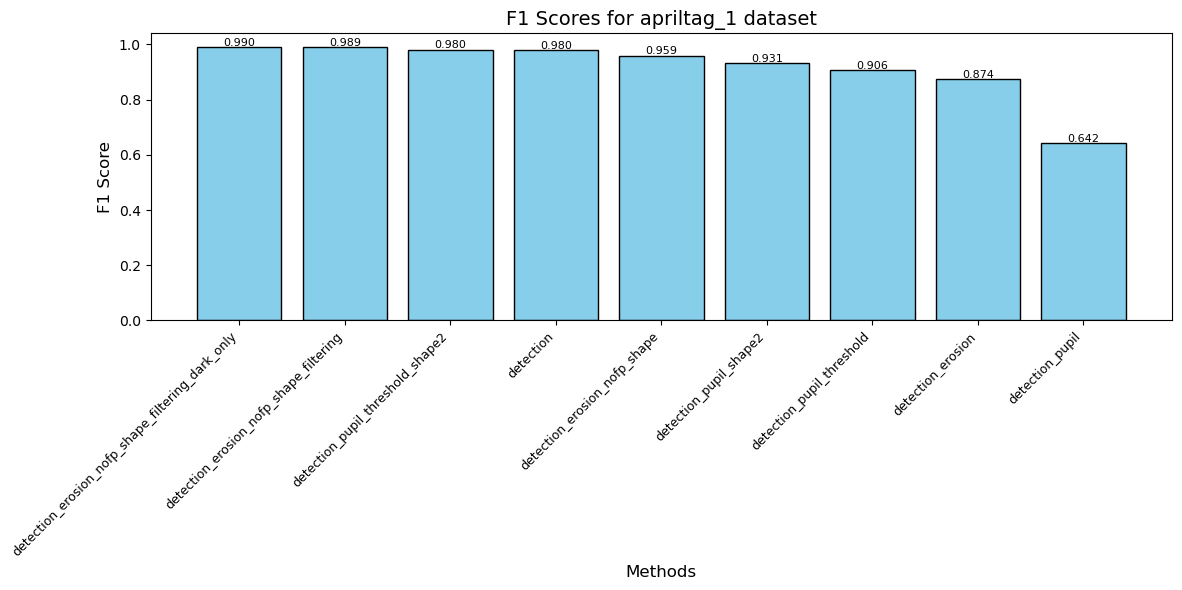

In [9]:
for dataset, data in metrics.items():
  data_sorted = dict(sorted(data.items(), key=lambda item: item[1]['f1_score'], reverse=True))

  # Extract labels and F1 scores
  labels = list(data_sorted.keys())
  f1_scores = [v['f1_score'] for v in data_sorted.values()]

  # Plot
  plt.figure(figsize=(12, 6))
  bar_positions = np.arange(len(labels))
  plt.bar(bar_positions, f1_scores, color='skyblue', edgecolor='black')

  # Add labels and title
  plt.xticks(bar_positions, labels, rotation=45, ha='right', fontsize=9)
  plt.xlabel('Methods', fontsize=12)
  plt.ylabel('F1 Score', fontsize=12)
  plt.title(f'F1 Scores for {dataset} dataset', fontsize=14)

  # Add values on top of bars
  for i, score in enumerate(f1_scores):
      plt.text(i, score + 0.005, f"{score:.3f}", ha='center', fontsize=8, color='black')

  plt.tight_layout()
  plt.show()
